# Boston Housing Data

With this dataset, we will attempt to predict the median price of homes in a given Boston suburb in the mid-1970s.
And, we predict the values using the given data points about the suburb like,  crime rate, the local property tax rate, etc.

The dataset is having total of 506 samples.

The 13 features in the input data are as follows:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

In [0]:
#Making the code results reproducible
import numpy as np
import tensorflow as tf
import random as rn

np.random.seed(42)
rn.seed(12345)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1,
                              inter_op_parallelism_threads=1)

from keras import backend as K


tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [0]:
from keras.datasets import boston_housing
import pandas as pd

In [0]:
(train_data,train_targets),(test_data,test_targets) =  boston_housing.load_data()

In [0]:
train_data.shape

(404, 13)

In [0]:
test_data.shape

(102, 13)

In [0]:
train_targets #values in thousands of dollars

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

# Apply Standard Scaler

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#Zero Mean, and Std Deviation = 1
ss = StandardScaler()

In [0]:
transformed_train_data = ss.fit_transform(train_data)
transformed_test_data = ss.transform(test_data)

In [0]:
np.mean(transformed_train_data)

2.6016254395785847e-15

In [0]:
np.std(transformed_train_data)

0.9999999999999993

# Building the Neural Networks

In [0]:
from keras import models,layers,optimizers,losses

In [0]:
network = models.Sequential()
network.add(layers.Dense(64,activation = 'relu',input_shape = (transformed_train_data.shape[1],)))
network.add(layers.Dense(64,activation = 'relu'))
network.add(layers.Dense(1))

W0702 00:19:33.802762 140075361249152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 00:19:33.807779 140075361249152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 00:19:33.813165 140075361249152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
network.compile(optimizer = optimizers.RMSprop(),
                loss = losses.mean_squared_error,
               metrics = ['mae'])

W0702 00:19:33.888622 140075361249152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# K-Fold Validation

When we have the very small data set like the one we have.

After we split into training data and Valdiation data, we would end up with very small data set for Validation data set.

And, the accuracy of thisValidation data set will depend entirely on the data points we choose for validation set.  
So the validation set might have high variance with respect to validation split. Thus preventing us to effectively evaluate our model.

In Such Situations,
We make use of K-Fold Validation.
So what we do is,
We split the available dataset into K partitions (normally, K = 4 or 5), and instantiating K identical models.
We training each one on K – 1 partitions and perform the evaluation on the remaining partition. 

Finally we arrive at the validation score for the model as the average of the K validation scores obtained.

In [0]:
data = [1,2,3,4,5,6,7,8,9,10,11,12]
k = 6
num_samples = len(data)//k

In [0]:
for i in range(k):
  print("for data-processing fold No.: ",i)
  val_data = data[(i*num_samples):(i+1)*num_samples]
  print("Validation set for fold :",i," is ",val_data)
  train_data = np.concatenate([data[:(i*num_samples)],data[(i+1)*num_samples:]],axis = 0)
  print("Training data for fold - ",i," is  ",train_data)

for data-processing fold No.:  0
Validation set for fold : 0  is  [1, 2]
Training data for fold -  0  is   [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
for data-processing fold No.:  1
Validation set for fold : 1  is  [3, 4]
Training data for fold -  1  is   [ 1  2  5  6  7  8  9 10 11 12]
for data-processing fold No.:  2
Validation set for fold : 2  is  [5, 6]
Training data for fold -  2  is   [ 1  2  3  4  7  8  9 10 11 12]
for data-processing fold No.:  3
Validation set for fold : 3  is  [7, 8]
Training data for fold -  3  is   [ 1  2  3  4  5  6  9 10 11 12]
for data-processing fold No.:  4
Validation set for fold : 4  is  [9, 10]
Training data for fold -  4  is   [ 1  2  3  4  5  6  7  8 11 12]
for data-processing fold No.:  5
Validation set for fold : 5  is  [11, 12]
Training data for fold -  5  is   [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [0]:
k = 4
num_samples = len(transformed_train_data)//k
num_epochs = 100
mae_scores = []

for i in range(k):
  print("Data Processing Fold no. : ",i)
  val_data = transformed_train_data[i*num_samples : (i+1)*num_samples]
  val_targets = train_targets[i*num_samples : (i+1)*num_samples]
  
  partial_train_data = np.concatenate([transformed_train_data[:i*num_samples],transformed_train_data[(i+1)*num_samples:]],axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i*num_samples],
                                         train_targets[(i+1)*num_samples:]],
                                        axis = 0)
  
  network = models.Sequential()
  network.add(layers.Dense(64,activation = 'relu',input_shape = (transformed_train_data.shape[1],)))
  network.add(layers.Dense(64,activation = 'relu'))
  network.add(layers.Dense(1))
  
  network.compile(optimizer = optimizers.RMSprop(),
                 loss = losses.mean_squared_error,
                 metrics = ['mae'])
  
  network.fit(partial_train_data,
             partial_train_targets,
             epochs = num_epochs,
             batch_size = 1,
             verbose = 0)
  
  val_mse,val_mae = network.evaluate(val_data,val_targets,verbose = 0)
  mae_scores.append(val_mae)

Data Processing Fold no. :  0


W0702 00:19:34.193623 140075361249152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0702 00:19:34.202530 140075361249152 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Data Processing Fold no. :  1
Data Processing Fold no. :  2
Data Processing Fold no. :  3


In [0]:
mae_scores

[2.0579718599225036, 2.463931192265879, 2.938631756470935, 2.5719722721836353]

In [0]:
np.mean(mae_scores)

2.5081267702107386

In [0]:
K.clear_session()

k = 4
num_samples = len(transformed_train_data)//k
num_epochs = 500
mae_scores = []

for i in range(k):
  print("Data Processing Fold no. : ",i)
  val_data = transformed_train_data[i*num_samples : (i+1)*num_samples]
  val_targets = train_targets[i*num_samples : (i+1)*num_samples]
  
  partial_train_data = np.concatenate([transformed_train_data[:i*num_samples],transformed_train_data[(i+1)*num_samples:]],axis = 0)
  partial_train_targets = np.concatenate([train_targets[:i*num_samples],
                                         train_targets[(i+1)*num_samples:]],
                                        axis = 0)
  
  network = models.Sequential()
  network.add(layers.Dense(64,activation = 'relu',input_shape = (transformed_train_data.shape[1],)))
  network.add(layers.Dense(64,activation = 'relu'))
  network.add(layers.Dense(1))
  
  network.compile(optimizer = optimizers.RMSprop(),
                 loss = losses.mean_squared_error,
                 metrics = ['mae'])
  
  history = network.fit(partial_train_data,
             partial_train_targets,
             epochs = num_epochs,
             batch_size = 1,
             validation_data = (val_data,val_targets),
             verbose = 0)
  
  val_mae = history.history['val_mean_absolute_error']
  mae_scores.append(val_mae)

Data Processing Fold no. :  0
Data Processing Fold no. :  1
Data Processing Fold no. :  2
Data Processing Fold no. :  3


In [0]:
average_mae_history = [np.mean([x[i] for x in mae_scores]) for i in range(num_epochs)]

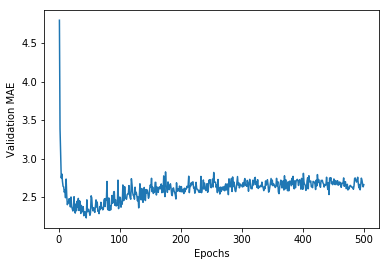

In [0]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

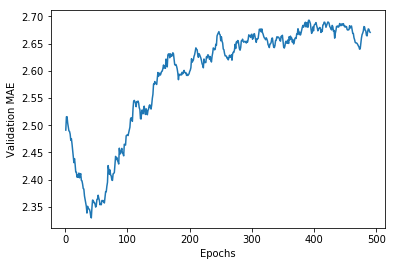

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

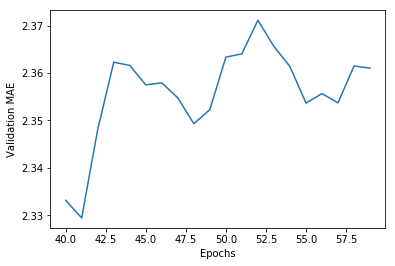

In [0]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(40,60), smooth_mae_history[40:60])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
  network = models.Sequential()
  network.add(layers.Dense(64, activation = 'relu',input_shape  = (transformed_train_data.shape[1],)))
  network.add(layers.Dense(64,activation = 'relu'))
  network.add(layers.Dense(1))
  network.compile(optimizer = 'rmsprop',
               loss = losses.mean_squared_error,
               metrics = ['mae'])
  history = network.fit(transformed_train_data,
             train_targets,
             epochs = 41,
             batch_size = 16,
             verbose = 0)
  test_mse_score, test_mae_score = network.evaluate(transformed_test_data, test_targets)

102/102 [==============================] - 0s 989us/step


In [0]:
test_mae_score

3.155978193470076